In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example(which='training_data', name='mpsa')
print(f'training N: {len(data_df)}')

data_df.head()

training N: 16446


,x,y
0,TAAGCTTTA,-3.455265
1,GCAGCCTAT,-3.135494
2,GTGGTAAGG,2.291043
3,TGGGCGCAG,-3.147840
4,GGTGCGGGC,0.547527


In [3]:
# Set seeed
mavenn.set_seed(0)

# Define model
model = mavenn.Model(regression_type='GE',
                     L=len(data_df['x'][0]),
                     alphabet='dna',
                     gpmap_type='pairwise',                     
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [4]:
# Summarize the model
model.get_nn().summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay [(None, 37)]         0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 36)           0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
pairwise_gp_map_layer (Pairwise (None, 1)            1333        Sequence_only[0][0]              
__________________________________________________________________________________________________
global_epistasis_layer (GlobalE (None, 1)            151         pairwise_gp_map_layer[0][0]      
_______________________________________________________________________________________

In [5]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               shuffle=True)

N = 16446 observations set as training data.
Data shuffled.


In [6]:
# Fit model to data
history = model.fit(learning_rate=.001,
                    epochs=1000,
                    early_stopping=True,
                    early_stopping_patience=30)

 
LSMR            Least-squares solution of  Ax = b

The matrix A has    16446 rows  and       36 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =       36

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.282e+02  3.186e+03   1.0e+00  1.9e-01
     1  0.00000e+00  1.231e+02  2.422e+03   9.6e-01  2.7e-01  7.2e+01  1.0e+00
     2  0.00000e+00  1.168e+02  8.516e+02   9.1e-01  4.3e-02  1.7e+02  1.4e+00
     3  0.00000e+00  1.151e+02  5.010e+02   9.0e-01  2.5e-02  1.8e+02  2.7e+00
     4  0.00000e+00  1.142e+02  1.098e+02   8.9e-01  5.2e-03  1.9e+02  2.6e+00
     5  0.00000e+00  1.142e+02  1.874e+01   8.9e-01  8.4e-04  2.0e+02  2.6e+00
     6  0.00000e+00  1.142e+02  8.303e+00   8.9e-01  3.6e-04  2.0e+02  2.6e+00
     7  0.00000e+00  1.142e+02  3.453e+00   8.9e-01  1.5e-04  2.1e+02  2.7e+00
     8  0.00000e+00  1.142e+02  9.574e-01   8.9e-01  3.9e-05  2.2e+02  2.6

264/264 [==============================] - 1s 2ms/step - loss: 38.6192 - val_loss: 37.7813
Epoch 64/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.5866 - val_loss: 37.8274
Epoch 65/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.5697 - val_loss: 37.9360
Epoch 66/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.5884 - val_loss: 37.6983
Epoch 67/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.5550 - val_loss: 37.7374
Epoch 68/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.5371 - val_loss: 37.6794
Epoch 69/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.5222 - val_loss: 37.7681
Epoch 70/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.5023 - val_loss: 37.6289
Epoch 71/1000
264/264 [==============================] - 1s 2ms/step - loss: 38.4585 - val_loss: 38.0624
Epoch 72/1000
264/264 [==============================] - 1s 2ms/step 

264/264 [==============================] - 1s 2ms/step - loss: 35.3483 - val_loss: 34.9488
Epoch 141/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.3692 - val_loss: 35.1629
Epoch 142/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.2216 - val_loss: 34.7157
Epoch 143/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.2924 - val_loss: 35.7647
Epoch 144/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.3948 - val_loss: 35.0560
Epoch 145/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.3354 - val_loss: 34.9687
Epoch 146/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.2822 - val_loss: 35.1945
Epoch 147/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.2400 - val_loss: 35.1083
Epoch 148/1000
264/264 [==============================] - 1s 2ms/step - loss: 35.2225 - val_loss: 35.7971
Epoch 149/1000
264/264 [==============================] - 1s 

264/264 [==============================] - 1s 2ms/step - loss: 34.9415 - val_loss: 34.8818
Epoch 218/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9785 - val_loss: 34.3168
Epoch 219/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9405 - val_loss: 34.7659
Epoch 220/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9857 - val_loss: 34.3291
Epoch 221/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9395 - val_loss: 34.7987
Epoch 222/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9752 - val_loss: 34.4712
Epoch 223/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9719 - val_loss: 34.2636
Epoch 224/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9615 - val_loss: 34.4968
Epoch 225/1000
264/264 [==============================] - 1s 2ms/step - loss: 34.9439 - val_loss: 34.2724
Epoch 226/1000
264/264 [==============================] - 1s 

In [7]:
# Save model
model.save('mpsa_ge_pairwise')

Model saved to these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [8]:
# Load model
model = mavenn.load('mpsa_ge_pairwise')

Model loaded from these files:
	mpsa_ge_pairwise.pickle
	mpsa_ge_pairwise.h5


In [9]:
# Load test data
test_df = mavenn.load_example(which='test_data',name='mpsa')
N_test = len(test_df)
print(f'test data N: {N_test:,}')

# Subsample indices for easy plotting
ix = np.random.rand(N_test) < 1

# Get x and y
x_test = test_df['x'].values[ix]
y_test = test_df['y'].values[ix]

test data N: 5,483


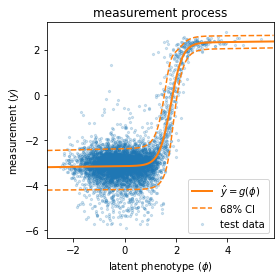

In [10]:
# Predict latent phentoype values (phi) on test data
phi_test = model.x_to_phi(x_test)

# Predict measurement values (yhat) on test data
yhat_test = model.x_to_yhat(x_test)

# Set phi lims and create grid in phi space
phi_lim = [min(phi_test)-.5, max(phi_test)+.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Compute yhat each phi gridpoint
yhat_grid = model.phi_to_yhat(phi_grid)

# Compute 90% CI for each yhat
q = [0.05, 0.95] #[0.16, 0.84]
yqs_grid = model.yhat_to_yq(yhat_grid, q=q)

# Create figure
fig, ax = plt.subplots(1, 1, figsize=[4, 4])

# Illustrate measurement process with GE curve
ax.scatter(phi_test, y_test, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1', label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')
ax.legend()

# Fix up plot
fig.tight_layout()
plt.show()

Automatically determined gpmap_type=pairwise.


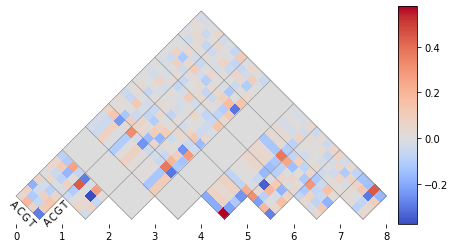

In [11]:
# Plot pairwise parameters
theta_pair_df = model.get_gpmap_parameters(which='pairwise')
fig, ax = plt.subplots(1, 1, figsize=[8, 4])
mavenn.heatmap_pairwise(theta_pair_df, ax=ax);